# 3.1 Hello World

In [46]:
# hello world 프로그램
print('hello, world!')

hello, world!


# 3.2 Hello 텐서플로 2.0

In [1]:
import tensorflow as tf
print(tf.__version__)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Anaconda\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Anaconda\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3

TypeError: can only concatenate str (not "list") to str

# 3.3 텐서플로 기초
### 3.3.1 난수 생성
랜덤은 신경망에서 꼭 필요한 기능으로 신명망을 쉽게 정의해보면 많은 숫자로 구성된 행렬이라고 할 수 있다.

In [2]:
# tf.random.uniform 함수를 불러오면 균일 분포의 난수를 얻을 수 있다.
# 균일 분포 : 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는다는 뜻.
rand = tf.random.uniform([1],0,1)
print(rand)

# 처음에 나오는 [1] : 결괏값의 shape 의미

tf.Tensor([0.16839945], shape=(1,), dtype=float32)


In [3]:
rand = tf.random.uniform([4],0,1)
rand

<tf.Tensor: id=13, shape=(4,), dtype=float32, numpy=array([0.9414444 , 0.20454705, 0.15322769, 0.33705056], dtype=float32)>

In [4]:
# tf.random.normal의 두번째와 세번째 인수는 앞에 나온 tf.random.uniform 과 다르다.
# 여기서 두번째는 정규분포의 평균이고 세번째는 정규분포의 표준편차이다.
# 표준편차가 1일때의 정규분포를 표준정규분포라고 한다.
rand = tf.random.normal([4],0,1)
rand

<tf.Tensor: id=19, shape=(4,), dtype=float32, numpy=array([-1.075482 , -1.8363982,  1.0346692,  1.2318964], dtype=float32)>

### 3.3.2 뉴런만들기
- 신경망은 뉴런이 여러 개 모여서 레이어를 구성한 후 이 레이어가 다시 모여 구성된 형태이다.
- 뉴런은 입력, 가중치, 활성화함수, 출력으로 구성된다.
- 활성화함수는 뉴런의 출력값을 정하는 합수입니다. 가장 간단한 형태의 뉴런은 입력에 가중치를 곱한 뒤
  활성화함수를 취하면 출력을 얻을 수 있다.
- 뉴런에서 학습할 때 변하는 것: 가중치 (처음에는 초기화를 통해 랜덤한 값을 넣고 학습 과정에서 점차 일정한 값으로 수렴)
  즉, 학습이 잘 된다는 것: 좋은 가중치를 얻어서 원하는 출력에 점점 가까운 값을 얻는 것

In [5]:
# 시그모이드 함수를 활성화 함수로 사용해보자.
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [6]:
x = 1
y = 0
w = tf.random.normal([1],0,1) # 가중치는 w로 정규분포의 랜덤한 값을 넣는다.
output = sigmoid(x * w)
output # 실제출력의 0.31과 기대출력의 0의 차이인 0 - 0.31인 -0.31을 에러(error)라고 한다.

0.7513909990692252

In [7]:
# 경사 하강법
# 뉴런이란 결국 w값이다. 결국 w를 변화시키는 것으로 그 방법 중의 하나가 경사 하강법이다.
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99 :
        print(i , error, output)

# 구한 error를 경사 하강법의 업데이트 식에 넣어 w 값을 다시 계산
# error 값은 0에 가까워지고 output도 기대출력인 0에 가까워지는 것을 확인.

99 -0.12140184211918656 0.12140184211918656
199 -0.05729532582945109 0.05729532582945109
299 -0.03701360356218444 0.03701360356218444
399 -0.027236393232382836 0.027236393232382836
499 -0.021512045370424143 0.021512045370424143
599 -0.017762053655412745 0.017762053655412745
699 -0.015118539716291849 0.015118539716291849
799 -0.013156203493853257 0.013156203493853257
899 -0.011642520456343362 0.011642520456343362
999 -0.010439794159262182 0.010439794159262182


In [8]:
# 그렇다면 입력으로 0을 넣었을때 출력으로 1을 얻는 뉴런은 어떻게 만들 수 있을까?
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w  = w + x + 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)
        
# error 값이 변하지 않고 출력도 0,5에서 변하지 않는다. 왜 그럴까?
# 우리가 입력으로 넣은 수는 0이다. 경사 하강법의 업데이트 식은 w = w + x * a * error 이다. x=0이기 때문에 w에 더해지는 값이 없다.
# 이럴때 편향(bias)를 사용한다.

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [9]:
# 편향은 w처럼 난수로 초기화되어 뉴런에 더해져 출력을 계산하게 된다. 수식에서는 관용적으로 bias 의 앞 글자인 b를 쓴다.
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

        
# 편향을 나타내는 b가 4번째 줄에 추가되어고 w처럼 tf.random.normal로 초기화한다.
# 실제출력인 output 값을 계산할 때 sigmoid(x * w + 1 * b)라는 수식을 계산해서 각 입력에 가중치와 편향을 곱해서
# 더해준 뒤 시그모이드 함수를 취한다.
# 기대출력과 실제출력의 차이인 error로 w와 b를 각각 업데이트해서 훈련을 학습시킨다.

99 0.08342547553554058 0.9165745244644594
199 0.046735377536254785 0.9532646224637452
299 0.03222804460049555 0.9677719553995044
399 0.024532808157381125 0.9754671918426189
499 0.019781451062246158 0.9802185489377538
599 0.01656168668847746 0.9834383133115225
699 0.014237997640696554 0.9857620023593034
799 0.012483179124310073 0.9875168208756899
899 0.011111612735277943 0.9888883872647221
999 0.01001044181371824 0.9899895581862818


### 3.3.3 첫 번째 신경망 네트워크 : AND
이 네트워크의 구성요소는 앞에서 본 것과 같은 뉴런이다.
AND 연산은 입력이 모두 참 값일 때 참이 되고 그 밖의 경우에는 모두 거짓이 된다. 

In [10]:
# True, False 의 정숫값 확인
print(int(True))
print(int(False))

1
0


In [13]:
# 사실 프로그래밍 언어에서는 관습적으로 거짓ㅇ르 0으로 표시하고 참을 0이 아닌 다른 값으로 표시해 왔습니다. if 1: 이라는 명령이 if True:와
# 동일하게 동작하는 것과 같은 이치입니다.
# 입력과 가중치를 곱한 다음에 서로 더하고 활성화 함수에 넣으면 뉴런의 출력을 계산할 수 있다.

import numpy as np
x = np.array([[1, 1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
    if i % 200 == 199:
        print(i, error_sum)

199 -0.114394732262303
399 -0.06712015353856947
599 -0.04739569910445148
799 -0.036522110207312136
999 -0.029651279463858322
1199 -0.024927174278367815
1399 -0.0214842347471449
1599 -0.018868277789529837
1799 -0.016811646076584027
1999 -0.0151560025498992


In [14]:
# 리스트에 정수를 곱하면 양수일 경우 숫자만큼 리스트의 원소를 반복하고 0 이하일 경우 빈 리스트를 반환
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [16]:
# 실수를 곱하면 에러
print([1,2,3]*0.01)

TypeError: can't multiply sequence by non-int of type 'float'

In [19]:
import numpy as np
print(np.array([1,2,3]*2))
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[1 2 3 1 2 3]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [20]:
# AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9646161991438873
X: [1 0] Y: [0] Output: 0.02507267187789903
X: [0 1] Y: [0] Output: 0.025149914144116374
X: [0 0] Y: [0] Output: 2.4336952812993352e-05


### 3.3.4 두번째 신경망 네트워크 : OR
OR은 AND와 비슷한 진리표를 가지고 있다. AND 연산의 입력이 모둔 참일 때만 결괏값이 참이었던 것과 다르게 OR 연산은 입력 중 하나만
참이어도 결괏값이 참이 되고 모두 거싯일때도 참이 된다.

In [29]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x *0.1 * error
        error_sum += error
        
    if i % 200 == 199:
            print(i, error_sum)

199 -0.050313769872160435
399 -0.026072764373781115
599 -0.017486982693764003
799 -0.013108729395463176
999 -0.010464478977753489
1199 -0.008698982973780904
1399 -0.007438427416457193
1599 -0.006493845523949819
1799 -0.005760904501770716
1999 -0.005174272353027878


In [28]:
# OR 네트워크 평가
for i in range(4):
    print('X:', x[i], 'Y:',y[i], 'Output:',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999971865264208
X: [1 0] Y: [1] Output: 0.9897677046897804
X: [0 1] Y: [1] Output: 0.9897431431562108
X: [0 0] Y: [0] Output: 0.02558908332223818


### 3.3.5 세 번째 신경망 네트워크 : XOR
XOR은 OR 과 비슷하지만 한 가지 차이점이 있다. 바로 홀수 개의 입력이 참일 때만 결괏값이 참이라는 점이다.

In [32]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b * b_x * 0.1 * error
        error_sum += error
    if i % 200 == 199:
        print(i, error_sum)
    

199 0.008473723025996693
399 0.008473737871108722
599 0.00847373787177852
799 0.00847373787177852
999 0.00847373787177852
1199 0.00847373787177852
1399 0.00847373787177852
1599 0.00847373787177852
1799 0.00847373787177852
1999 0.00847373787177852


In [37]:
# XOR 네트워크 평가
for i in range(4):
    print('X:', x[i], 'Y:',y[i], 'Output:',sigmoid(np.sum(x[i]*w)+b))
    
    
# x가 변해도 output은 0.5 근처에서 머물고 있다.
# 중간 계산값이 0에 가까워 지기 때문에 최종 출력이 0.5에 가까워진다. 

X: [1 1] Y: [0] Output: 0.5084737574239353
X: [1 0] Y: [1] Output: 0.5042371732047128
X: [0 1] Y: [1] Output: 0.5042371927610824
X: [0 0] Y: [0] Output: 0.5


In [34]:
# w와 b를 출력해보자.
print('w:', w)
print('b:', b)

w: tf.Tensor([0.0169491  0.01694918], shape=(2,), dtype=float32)
b: tf.Tensor([0.], shape=(1,), dtype=float32)


In [38]:
# w에 순차적으로 x가 곱해지기 때문에 첫번째 입력이 두번째 입력보다 큰 영향을 미치고
# 편향은 두번째 입력과 비슷하게 거의 영향이 없는 것을 알 수 있다.
# 이렇게 얻은 값에 시그모이드 함수를 취하면 최종값이 된다.

In [40]:
# tf.keras를 이용한 XOR 네트워크 연산
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')

model.summary()

# tf.keras.Dense는 model 에서 사용하는 레이어를 정의하는 명령이다. Dense는 가장 기본적인 레이어로서, 레이어의 입출력 사이에 있는
# 모든 뉴런이 서로 연결되는 레이어이다.

# if.keras.Dense 안에 있는 units는 레이어를 구성하는 뉴런의 수를 정의한다. 뉴런이 많을수록 일반적으로 레이어의 성능은 좋아지지만
# 계산량 또한 늘어나고 메모리도 많이 차지한다.

# Dense 레이어의 파라미터 수: (입력측 뉴런의 수 + 1) X (출력측 뉴런의 수)
# 즉, dense_2 = (2 + 1) * 2 = 6, dense_3 = (2 + 1) X 1 = 3
# SGD : Stochastic Gradient Descent
# MSE : Mean Squared Error 
#lr(Learning rate) : 학습률
# hyper-parameter

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [42]:
# tf.keras 를 이용한 2-레이어 XOR 네트워크 학습
history = model.fit(x,y, epochs=2000, batch_size=1)

# model.fit() : for 문을 실행시킨 것처럼 epochs에 지정된 횟수만큼 학습을 시킨다.
# batch_size : 한번에 학습시키는 데이터 수

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 8ms/sample - loss: 0.0330
Epoch 2/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0329
Epoch 3/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0328
Epoch 4/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0327
Epoch 5/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0326
Epoch 6/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0325
Epoch 7/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0325
Epoch 8/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0324
Epoch 9/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0323
Epoch 10/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0322
Epoch 11/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0321
Epoch 12/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0320
Epoch 

4/4 [==============================] - 0s 3ms/sample - loss: 0.0209
Epoch 199/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0208
Epoch 200/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0208
Epoch 201/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0207
Epoch 202/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0207
Epoch 203/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0207
Epoch 204/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0206
Epoch 205/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0206
Epoch 206/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0205
Epoch 207/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0205
Epoch 208/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0205
Epoch 209/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0204
Epoch 210/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.0148
Epoch 395/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0147
Epoch 396/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0147
Epoch 397/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0147
Epoch 398/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0147
Epoch 399/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0146
Epoch 400/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0146
Epoch 401/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0146
Epoch 402/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0146
Epoch 403/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0145
Epoch 404/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0145
Epoch 405/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0145
Epoch 406/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.0112
Epoch 591/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0112
Epoch 592/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0112
Epoch 593/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0112
Epoch 594/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0112
Epoch 595/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0111
Epoch 596/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0111
Epoch 597/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0111
Epoch 598/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0111
Epoch 599/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0111
Epoch 600/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0111
Epoch 601/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0111
Epoch 602/2000
4/4 

4/4 [==============================] - 0s 4ms/sample - loss: 0.0090
Epoch 786/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0089
Epoch 787/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0089
Epoch 788/2000
4/4 [==============================] - 0s 8ms/sample - loss: 0.0089
Epoch 789/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0089
Epoch 790/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0089
Epoch 791/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0089
Epoch 792/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0089
Epoch 793/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0089
Epoch 794/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0089
Epoch 795/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0089
Epoch 796/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0088
Epoch 797/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.0074
Epoch 982/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0074
Epoch 983/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0074
Epoch 984/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0074
Epoch 985/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0074
Epoch 986/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0074
Epoch 987/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0074
Epoch 988/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0073
Epoch 989/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0073
Epoch 990/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0073
Epoch 991/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0073
Epoch 992/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0073
Epoch 993/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.0063
Epoch 1175/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0063
Epoch 1176/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0063
Epoch 1177/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0063
Epoch 1178/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0063
Epoch 1179/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0063
Epoch 1180/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0063
Epoch 1181/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0063
Epoch 1182/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0062
Epoch 1183/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0062
Epoch 1184/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0062
Epoch 1185/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0062
Epoch 11

4/4 [==============================] - 0s 3ms/sample - loss: 0.0054
Epoch 1369/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0054
Epoch 1370/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0054
Epoch 1371/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0054
Epoch 1372/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0054
Epoch 1373/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0054
Epoch 1374/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0054
Epoch 1375/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0054
Epoch 1376/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0054
Epoch 1377/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0054
Epoch 1378/2000
4/4 [==============================] - ETA: 0s - loss: 0.004 - 0s 4ms/sample - loss: 0.0054
Epoch 1379/2000
4/4 [==============================] - 0s 4ms/sample

4/4 [==============================] - 0s 3ms/sample - loss: 0.0048
Epoch 1563/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 1564/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0048
Epoch 1565/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 1566/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0048
Epoch 1567/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0048
Epoch 1568/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 1569/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 1570/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 1571/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 1572/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 1573/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0048
Epoch 15

4/4 [==============================] - 0s 4ms/sample - loss: 0.0043
Epoch 1756/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 1757/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 1758/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 1759/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0043
Epoch 1760/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0043
Epoch 1761/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0043
Epoch 1762/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 1763/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 1764/2000
4/4 [==============================] - ETA: 0s - loss: 0.005 - 0s 3ms/sample - loss: 0.0043
Epoch 1765/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0042
Epoch 1766/2000
4/4 [==============================] - 0s 4ms/sample

4/4 [==============================] - 0s 3ms/sample - loss: 0.0038
Epoch 1950/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0038
Epoch 1951/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0038
Epoch 1952/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0038
Epoch 1953/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0038
Epoch 1954/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0038
Epoch 1955/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0038
Epoch 1956/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0038
Epoch 1957/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0038
Epoch 1958/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0038
Epoch 1959/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0038
Epoch 1960/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0038
Epoch 19

In [1]:
# tf.keras 를 이용한 2-레이어 XOR 네트워크 평가
model.predict(x)

NameError: name 'model' is not defined

In [44]:
# 가중치와 편향 확인
for weight in model.weights:
    print(weight)
    
# 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용하는 가중치: kernel
# 편향과 연결된 가중치 : bias

<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.1988583,  4.7108226],
       [ 5.049837 , -4.9285693]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-2.8978095, -2.6753633], dtype=float32)>
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[6.95384  ],
       [7.0125384]], dtype=float32)>
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([-3.437784], dtype=float32)>


# 3.4 시각화 기초

### 3.4.1 matplotlib.pyplot을 이용한 그래프 그리기

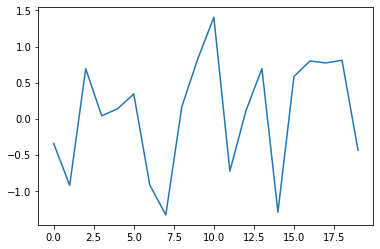

In [49]:
# 간단한 꺽은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

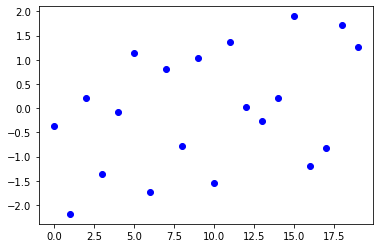

In [50]:
# 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y= tf.random.normal([20],0,1)
plt.plot(x,y,'bo')  # bo, b-, b-- ...
plt.show()

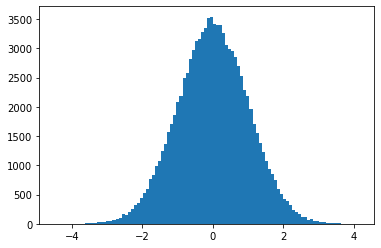

In [51]:
# 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100) # hist: 히스토그램
plt.show()

### 3.4.2 2-레이어 XOR 네트워크 정보 시각화

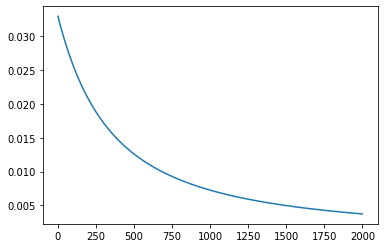

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# 3.5 정리
- 실제로 등작하는 AND,OR,XOR 네트워크를 사용하는 방법을 배웠고 tf.keras 를 이용하여 간략하게 2-레이어 구조의 네트워크 생성
- matplotlib.pyplot 을 이용하여 학습 결과를 시각화